# Particle Swarm Optimization (PSO) in 2D

This notebook demonstrates the implementation of the Particle Swarm Optimization (PSO) algorithm in a 2D space. The PSO algorithm is used to find the minimum of a given fitness function. The notebook includes the following sections:

- Introduction to PSO
- Fitness Function Definition
- Visualization of the Fitness Function
- PSO Algorithm Implementation
- Results and Conclusion

### Introduction to PSO

Particle Swarm Optimization (PSO) is a computational method used for optimization problems. It optimizes a problem by iteratively improving a candidate solution with regard to a given measure of quality (fitness function). PSO is inspired by the social behavior of birds flocking or fish schooling.


In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

### Fitness Function Definition

In [4]:
def fitness(x1, x2):
    f1 = (x1-3.14)**2
    f2 = (x2-2.72)**2
    f3 = np.sin(3*x1+1.41) + np.sin(4*x2-1.73)
    z = f1+f2+f3
    return z

### Visualization of the Fitness Function

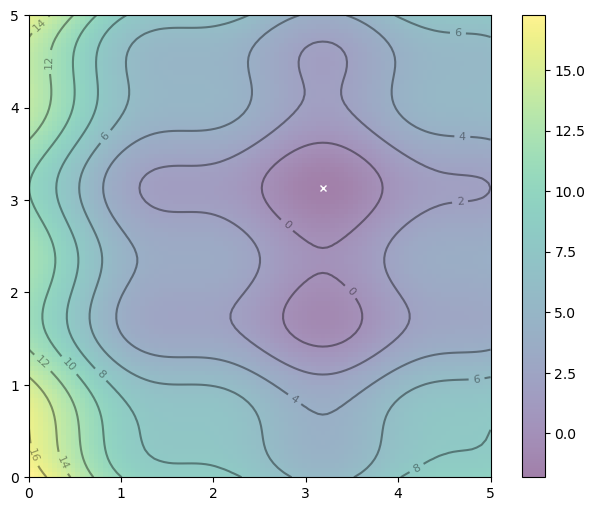

In [5]:
x, y = np.array(np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100)))
z = fitness(x, y)
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
plt.figure(figsize=(8, 6))
plt.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker='x', markersize=5, color='white')
contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt='%.0f')
plt.show()

## PSO Algorithm Implementation

We implement the PSO algorithm with the following key components:

- Updating particle positions
- Updating particle velocities
- The main PSO loop


In [6]:
def update_pos(particle, vel):
    new_particle = particle + vel
    return new_particle

In [13]:
def update_vel(position, velocity, pbest_pos, gbest_pos, w=0.5, c1=1, c2=1):
    # Inertia component
    inertia = w * np.array(velocity)
    
    # Cognitive component (based on pbest)
    cognitive = c1 * random.random() * (np.array(pbest_pos) - np.array(position))
    
    # Social component (based on gbest)
    social = c2 * random.random() * (np.array(gbest_pos) - np.array(position))
    
    # Update velocity
    new_velocity = inertia + cognitive + social
    
    return new_velocity

In [16]:
def pso_2d(pop, dim, pos_min, pos_max, gen, fitness_crit):
    particles = [[random.uniform(pos_min, pos_max) for j in range(dim)] for i in range(pop)]
    pbest_pos = particles
    pbest_fitness = [fitness(p[0], p[1]) for p in particles]
    gbest_index = np.argmin(pbest_fitness)
    gbest_pos = pbest_pos[gbest_index]
    vel = [[0.0 for j in range(dim)] for i in range(pop)]
    
    for t in range(gen):
        if np.average(pbest_fitness) <= fitness_crit:
            break
        
        else:
            for n in range(pop):
                vel[n] = update_vel(particles[n], vel[n], pbest_pos[n], gbest_pos)
                particles[n] = update_pos(particles[n], vel[n])
            pbest_fitness = [fitness(p[0], p[1]) for p in particles]
            gbest_index = np.argmin(pbest_fitness)
            gbest_pos = pbest_pos[gbest_index]
            
    print('Global Best Pos:', gbest_pos)
    print('Best Fitness Value:', min(pbest_fitness))
    print('Average Particle Best Fitness Value:', np.average(pbest_fitness))
    print('Number of Generations:', t)

In [17]:
pso_2d(100, 2, -100, 100, 400, 0.0004)

Global Best Pos: [3.18933838 3.1528237 ]
Best Fitness Value: -1.8035524134502547
Average Particle Best Fitness Value: -0.14576061374959975
Number of Generations: 16


## Results and Conclusion

After running the PSO algorithm, we obtain the following results:

- Global Best Position: `[x, y]`
- Best Fitness Value: `value`
- Average Particle Best Fitness Value: `value`
- Number of Generations: `generations`

These results indicate that the PSO algorithm effectively finds the minimum of the fitness function within the given constraints.
